In [75]:
from rdkit import Chem
import pickle

from ipywidgets import interact, fixed, IntSlider
import ipywidgets
import py3Dmol

def show_mol(mol, view, grid):
    mb = Chem.MolToMolBlock(mol)
    view.removeAllModels(viewer=grid)
    view.addModel(mb,'sdf', viewer=grid)
    view.setStyle({'model':0},{'stick': {}}, viewer=grid)
    view.zoomTo(viewer=grid)
    return view

def view_single(mol):
    view = py3Dmol.view(width=600, height=600, linked=False, viewergrid=(1,1))
    show_mol(mol, view, grid=(0, 0))
    return view

def MolTo3DView(mol, size=(600, 600), style="stick", surface=False, opacity=0.5, confId=0):
    """Draw molecule in 3D
    
    Args:
    ----
        mol: rdMol, molecule to show
        size: tuple(int, int), canvas size
        style: str, type of drawing molecule
               style can be 'line', 'stick', 'sphere', 'carton'
        surface, bool, display SAS
        opacity, float, opacity of surface, range 0.0-1.0
    Return:
    ----
        viewer: py3Dmol.view, a class for constructing embedded 3Dmol.js views in ipython notebooks.
    """
    assert style in ('line', 'stick', 'sphere', 'carton')
    # mblock = Chem.MolToMolBlock(mol[confId])
    mblock = Chem.MolToMolBlock(mol)
    viewer = py3Dmol.view(width=size[0], height=size[1])
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    if surface:
        viewer.addSurface(py3Dmol.SAS, {'opacity': opacity})
    viewer.zoomTo()
    return viewer

def conf_viewer(mol):
    return MolTo3DView(mol).show()

In [76]:
def smi2idx(smi):
    probe_smi = smi
    path = "/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-plati/pre-train/split_mols/test_ref"
    path = Path(path)
    for sdfile in path.iterdir():
        mols = Chem.SDMolSupplier(str(sdfile))
    
        mol = next(mols) # first mol in mols
        if mol.GetProp("_SMILES") == probe_smi:
            return int(sdfile.stem)

In [77]:
from rdkit import Chem
from pathlib import Path
from collections import defaultdict
torsiontxt = Path("/pubhome/qcxia02/git-repo/AI-CONF/GeoMol/scripts/torsion_smarts/tor_smarts.txt")
torsionsmarts = torsiontxt.read_text().split("\n")
sdsupplier = Chem.SDMolSupplier("/pubhome/qcxia02/git-repo/AI-CONF/datasets/platinum_diverse_dataset_2017_01.sdf")
torsionsmarts

['O=[C:1][NX3H0:2]!@[CX4H0:3][C:4]',
 '[CH0:1][NX3:2]([CH1])!@[c:3][a:4]',
 '[cH1:1][c:2]([cH1])!@[NX3:3][CX4:4]',
 '[a:1][a:2]!@[NX3:3][!#1:4]',
 '[H:1][CX4H1:2]!@[SX4:3][!#1:4]',
 '[aH1:1][c:2]([aH0])!@[SX2:3][!#1:4]',
 '[aH0:1][c:2]([aH0])!@[SX2:3][!#1:4]',
 '[c:1][CX4:2]!@[CX3:3]=[O:4]',
 '[cH0:1][c:2]([cH1])!@[c:3]([cH0:4])[cH1]',
 '[cH0:1][c:2]!@[CX4H2:3][N,O,S:4]',
 '[cH0:1][c:2]!@[CX4H2:3][!#1:4]',
 '[cH0:1][c:2]!@[CX4H1:3][CX4:4]O=[C:1][NX3H0:2]!@[CX4H0:3][C:4]']

In [78]:
torsion_idx_dict = defaultdict(list)
torsion_smi_dict = defaultdict(list)

for i, mol in enumerate(sdsupplier):
    for torsion in torsionsmarts:
        torsionQuery = Chem.MolFromSmarts(torsion) 
        if mol.GetSubstructMatches(torsionQuery):
            torsion_smi_dict[torsion].append(Chem.MolToSmiles(mol))
            torsion_idx_dict[torsion].append(i+1)

In [79]:
import pandas as pd
# torsion_idx_dict["O=[C:1][NX3H0:2]!@[CX4H0:3][C:4]"]
k = list(torsion_smi_dict.keys())
v = list(torsion_smi_dict.values())
v2 = list(torsion_idx_dict.values())
torsion_smi_idx_df = pd.DataFrame(list(zip(k, v, v2)), columns=['torsion', 'smi', 'idxplati'])
# torsion_smi_df = pd.DataFrame(list(zip(k, v)), columns=['torsion', 'smi'])
# torsion_smi_df['idxplati'] = v2
# torsion_smi_idx_df = torsion_smi_df
# torsion_smi_idx_df.to_csv("torsion_pattern_platinum.csv")

# torsion_idx_dict
# torsion_smi_dict
# list(torsion_smi_dict.keys())
torsion_smi_idx_df


,torsion,smi,idxplati
0,[a:1][a:2]!@[NX3:3][!#1:4],"[O=[N+]([O-])c1cc(C(F)(F)F)ccc1NCc1ccco1, Cc1c...","[2, 5, 6, 8, 9, 10, 11, 12, 19, 20, 24, 25, 28..."
1,[cH1:1][c:2]([cH1])!@[NX3:3][CX4:4],[Cc1cc(Nc2nn(C(C)C)c(=O)c3cc(N4CC[NH+](C)CC4)c...,"[5, 55, 119, 148, 149, 175, 178, 192, 200, 204..."
2,"[cH0:1][c:2]!@[CX4H2:3][N,O,S:4]",[CC(=O)Nc1cc(Oc2ccc3c(c2)CCN3C(=O)Nc2ccc(C[NH+...,"[11, 61, 66, 68, 129, 143, 151, 157, 171, 246,..."
3,[cH0:1][c:2]!@[CX4H2:3][!#1:4],[CC(=O)Nc1cc(Oc2ccc3c(c2)CCN3C(=O)Nc2ccc(C[NH+...,"[11, 33, 61, 66, 68, 82, 103, 116, 121, 129, 1..."
4,[cH0:1][c:2]([cH1])!@[c:3]([cH0:4])[cH1],[CCn1c(=O)c(-c2cc(C(=O)NC3CC3)ccc2C)cc2nnc(-c3...,"[32, 265, 356, 362, 436, 514, 546, 764, 775, 8..."
5,[c:1][CX4:2]!@[CX3:3]=[O:4],[CC(C)[NH2+]CC(C(=O)N1CCN(c2ncnc3c2C(C)CC3O)CC...,"[106, 130, 183, 192, 262, 281, 288, 311, 356, ..."
6,[CH0:1][NX3:2]([CH1])!@[c:3][a:4],[CC1CCC(C(=O)N(c2cc(C#CC(C)(C)C)sc2C(=O)[O-])C...,"[109, 149, 205, 255, 258, 508, 740, 769, 774, ..."
7,[aH0:1][c:2]([aH0])!@[SX2:3][!#1:4],[CCc1[nH]c2nc(Sc3cnc4nccnc4c3)nc(N3CCC([NH3+])...,"[184, 511, 752, 893, 1468, 1622, 1818, 1893, 2..."
8,[aH1:1][c:2]([aH0])!@[SX2:3][!#1:4],[O=C(CCSc1nc2ccccc2c(=O)[nH]1)NC1CCC(c2nnc(-c3...,"[382, 488, 752, 835, 1152, 1237, 1352, 2038, 2..."
9,O=[C:1][NX3H0:2]!@[CX4H0:3][C:4],[CC(C)c1cccc(C[NH2+]CC(O)C(Cc2ccccc2)NC(=O)C2C...,"[1210, 1583, 2304]"


In [ ]:
probe_idx = 1583
for i, mol in enumerate(sdsupplier):
    if i == probe_idx - 1:
        conf_viewer(mol)

In [80]:
summary_df = pd.read_csv("/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-plati/pre-train/test_GeoMol_50_cutoff0.7-test_rdkit_50-th5.0-maxm100-removeH-sumamry.csv")

smi_diff_2 = list(summary_df[summary_df['index_len2']>0]['smi'] )

torsion_idxdiff2_dict = defaultdict(list)
torsion_idxplati_dict = defaultdict(list)

for group, smis in enumerate(list(torsion_smi_idx_df['smi'])):
    # print(list(torsion_smi_dict.keys())[group])
    torsion = list(torsion_smi_dict.keys())[group]

    for smi in smis:
        if smi in smi_diff_2:
            # print(list(summary_df[summary_df['smi'] == smi]['No.'])) 
            idxdiff2 = list(summary_df[summary_df['smi'] == smi]['No.'])[0]
            torsion_idxdiff2_dict[torsion].append(idxdiff2)
            idxplati = smi2idx(smi)
            torsion_idxplati_dict[torsion].append(idxplati)

            # print(smi)


In [22]:
k = list(torsion_idxdiff2_dict.keys())
v = list(torsion_idxdiff2_dict.values())
v2 = list(torsion_idxplati_dict.values())
torsion_idxdiff2_idxplati_df = pd.DataFrame(list(zip(k, v, v2)), columns=['torsionSmarts', 'idxdiff2', 'idxplati'])# summary_df[summary_df['No.'] == idx]['smi']

torsion_idxdiff2_idxplati_df.to_csv("torsion_idxdiff2_idxplati.csv")

In [ ]:
probe_idx = 1583
for i, mol in enumerate(sdsupplier):
    if i == probe_idx - 1:
        conf_viewer(mol)

In [52]:
# Then comes to one-by-one visualization
from rdkit.Chem import rdMolTransforms as rdMT
from rdkit import Chem
from rdkit.Chem.Lipinski import RotatableBondSmarts

def findneighbour(mol, idxr) -> list:
    atom = mol.GetAtomWithIdx(idxr) #Atoms: c(harged)atom
    neighbours = atom.GetNeighbors() #list of Atoms: neighbour atoms of catom
    neigh_idxr = [x.GetIdx() for x in neighbours] #list of int: idxes of neighbours 

    return neigh_idxr

def gettorsionangle(sdfile, torsion_smarts):
    torsionQuery = Chem.MolFromSmarts(torsion_smarts)
    sdsupplier = Chem.SDMolSupplier(sdfile)
    torsion_angles = []
    # mol = next(Chem.SDMolSupplier(sdfile))
    for i, mol in enumerate(sdsupplier):
        substruc = mol.GetSubstructMatches(torsionQuery)[0]
        rotstruc = mol.GetSubstructMatches(RotatableBondSmarts)
        for rot in rotstruc:
            if rot[0] in substruc and rot[1] in substruc:
                idxr2, idxr3 = rot
                a=findneighbour(mol, idxr2)
                a.remove(idxr3)
                b=findneighbour(mol, idxr3)
                b.remove(idxr2)
                idxr1 = a[0]
                idxr4 = b[0]
                # print(rdMT.GetDihedralDeg(mol.GetConformer(0), idxr1, idxr2, idxr3, idxr4))
                # torsion_angles.append(rdMT.GetDihedralDeg(mol.GetConformer(0), idxr1, idxr2, idxr3, idxr4))
                torsion_angles.append(rdMT.GetDihedralDeg(mol.GetConformer(0), idxr1, idxr2, idxr3, idxr4) + 180)

    return torsion_angles

torsion_smarts = "[cH0:1][c:2]([cH1])!@[c:3]([cH0:4])[cH1]"
ref_sdfile = "/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-plati/pre-train/split_mols/test_ref/0265.sdf"
rdk_sdfile = "/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-plati/pre-train/split_mols/test_rdkit_50/0265.sdf"
GeoMol_sdfile = "/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-plati/pre-train/split_mols/test_GeoMol_50_cutoff0/0260.sdf"

ref_TA = gettorsionangle(ref_sdfile,torsion_smarts)
rdk_TA = gettorsionangle(rdk_sdfile,torsion_smarts)
geo_TA = gettorsionangle(GeoMol_sdfile,torsion_smarts)
# for atom in mol.GetAtoms():
    # atom.SetProp('atomLabel',str(atom.GetIdx()+1))

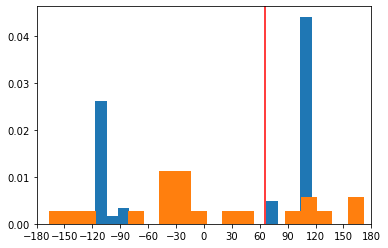

In [47]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import MultipleLocator

import pandas as pd
# torsion_angles = pd.Series(torsion_angles)
ax = plt.subplot()
# plt.hist(ref_TA, bins=20 , linewidth=0.5, density=True)
plt.axvline(ref_TA[0], color = 'red')
plt.hist(rdk_TA, bins=20 , linewidth=0.5, density=True)
plt.hist(geo_TA, bins=20 , linewidth=0.5, density=True)

x_major_locator=MultipleLocator(30) # for define the sep length
# y_major_locator=MultipleLocator(10)
ax.xaxis.set_major_locator(x_major_locator)
# ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(-180,180)
# plt.ylim(-5,110)
plt.show()



In [ ]:
# Multiple mols for one torsion pattern


In [141]:
import pandas as pd

# torsion_smarts = "[cH0:1][c:2]([cH1])!@[c:3]([cH0:4])[cH1]"
# torsion_smarts ="[a:1][a:2]!@[NX3:3][!#1:4]"
# torsion_smarts ="[cH1:1][c:2]([cH1])!@[NX3:3][CX4:4]"
# torsion_smarts ="[cH0:1][c:2]!@[CX4H2:3][N,O,S:4]"
# torsion_smarts ="[cH0:1][c:2]!@[CX4H2:3][!#1:4]"
torsion_smarts ="[cH0:1][c:2]([cH1])!@[c:3]([cH0:4])[cH1]"
# torsion_smarts ="[c:1][CX4:2]!@[CX3:3]=[O:4]"
# torsion_smarts ="[CH0:1][NX3:2]([CH1])!@[c:3][a:4]"
# torsion_smarts ="[aH0:1][c:2]([aH0])!@[SX2:3][!#1:4]"
# torsion_smarts ="[aH1:1][c:2]([aH0])!@[SX2:3][!#1:4]"
# torsion_smarts ="O=[C:1][NX3H0:2]!@[CX4H0:3][C:4]"

torsion_idxdiff2_idxplati_df = pd.read_csv("/pubhome/qcxia02/git-repo/AI-CONF/GeoMol/scripts/torsion_smarts/torsion_idxdiff2_idxplati.csv")
subdf = torsion_idxdiff2_idxplati_df[torsion_idxdiff2_idxplati_df['torsionSmarts'] == torsion_smarts]
geo_idx = list([ str(int(idx)).zfill(4) for idx in list(subdf['idxdiff2'].values)[0][1:-1].split(",")])
plati_idx = list([ str(int(idx)).zfill(4) for idx in list(subdf['idxplati'].values)[0][1:-1].split(",")])
# print(geo_idx)
print(list(subdf['idxdiff2'].values)[0][1:-1].split(","))
# '''
ref_sdfiles = list([
    f"/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-plati/pre-train/split_mols/test_ref/{idx}.sdf"
    for idx in plati_idx
])

rdk_sdfiles = list([
    f"/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-plati/pre-train/split_mols/test_rdkit_50/{idx}.sdf"
    for idx in plati_idx
])

GeoMol_sdfiles = list([
    f"/pubhome/qcxia02/git-repo/AI-CONF/datasets/GeoMol/test/drugs-plati/pre-train/split_mols/test_GeoMol_50_cutoff0/{idx}.sdf"
    for idx in geo_idx
])
ref_TA, rdk_TA, geo_TA = [], [], []
for sdfile in ref_sdfiles:
    ref_TA.extend(gettorsionangle(sdfile,torsion_smarts))
for sdfile in rdk_sdfiles:
    rdk_TA = gettorsionangle(sdfile,torsion_smarts)
for sdfile in GeoMol_sdfiles:
    geo_TA = gettorsionangle(sdfile,torsion_smarts)
# '''

['260', ' 348', ' 845']


[245.84070569284074, 295.5195956071108, 109.44299756283904]

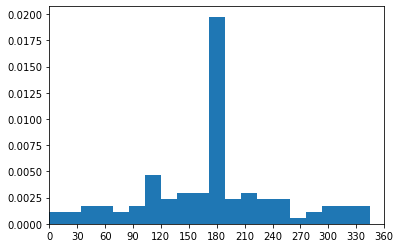

In [140]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import MultipleLocator

import pandas as pd
# torsion_angles = pd.Series(torsion_angles)
ax = plt.subplot()
# plt.hist(ref_TA, bins=20 , linewidth=0.5, density=True)
# for TA in ref_TA:
    # plt.axvline(TA, color = 'red', linewidth=1)
plt.hist(rdk_TA, bins=20 , linewidth=0.5, density=True)
# plt.hist(geo_TA, bins=20 , linewidth=0.5, density=True)

x_major_locator=MultipleLocator(30) # for define the sep length
# y_major_locator=MultipleLocator(10)
ax.xaxis.set_major_locator(x_major_locator)
# ax.yaxis.set_major_locator(y_major_locator)
# plt.xlim(-180,180)
plt.xlim(0,360)

# plt.ylim(-5,110)
plt.show()

,Unnamed: 0,torsionSmarts,idxdiff2,idxplati
2,2,"[cH0:1][c:2]!@[CX4H2:3][N,O,S:4]","[11, 64, 66, 127, 141, 241, 276, 277, 359, 406...","['0011', '0066', '0068', '0129', '0143', '0246..."
